## Diesel Truck Data


The data was gathered on diesel truck Inline 6-cylinder, 4-stroke-cycle.  The truck sensors(channels) are measured based on indutry standard.  

There are two industry standard.  One is Society of Automotive Engineers standard SAE J1939 is the vehicle bus recommended practice used for communication and diagnostics among vehicle components. Originating in the car and heavy-duty truck industry in the United States, it is now widely used in other parts of the world.  

The J1587 protocol is exclusively used within heavy duty vehicles, where it is used for data exchange between nodes in a network, driver information or diagnosis. Areas of use are: Vehicle and component information (performance, maintenance, diagnosis).  In this research, the team used both as they are available to capture the system behaviors.  

In this project, we will focus on the enigne system


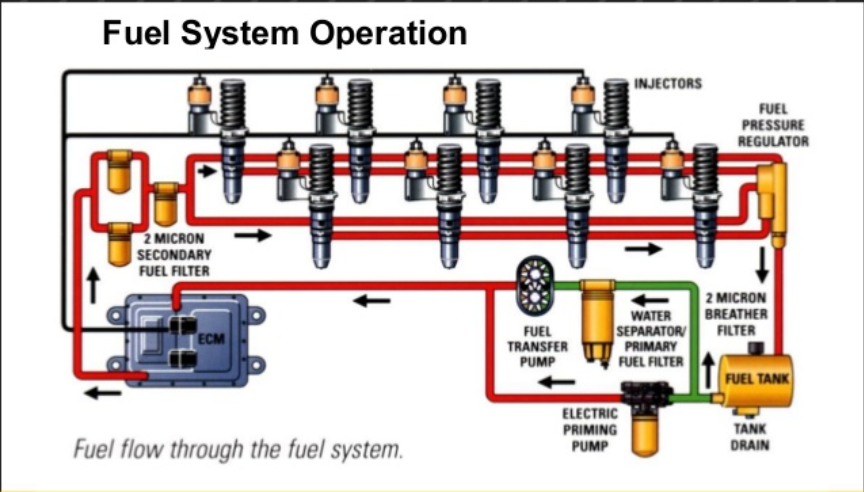

In [18]:
from IPython.display import Image
#Image(filename='LubeSystem.png')
Image(filename='fuelsystem.png')
#The image was taken from https://www.slideshare.net/wilbort/engine-systems-diesel-engine-analyst-full
#https://www.conequip.com/docs/cat_c7_diesel_engine_parts_diagram.pdf

The sensor channels details that are relevant to the discussions. The team used lot more channels for the analysis, but we will provide some background on some the channels to understand the data.  Due to the limited space, we will not discuss details ofall the channels.  

                        TransOilTemp    = Transmission Oil Temperature 
                        InstFuelEco     = Instantaneous fuel Economy   
                        VehSpeedEng     = Vehicle Speed (miles per hour) 
                        AccelPedalPos   = Accelerated Pedal Position (%) 
                        BoostPres       = Turbo Boost Pressure (psi)
                        InjCtrlPres     = Injector Control Pressure (psi) 
                        PctEngLoad      = Percent Engine Load  (%) 
                        EngSpeed        = Engine Speed (engine revolution per minute) 
                        Fuel Rate       = Fuel Rate or fuel consumption rate (gallons per hour) 
                        EngCoolantTemp  = Engine Coolant Temperature (Degree F) 
                        
The sensors listed are crucial for monitoring the performance and health of an engine. Each sensor provides data that can help in understanding how the engine is running, diagnosing issues, and improving fuel efficiency and performance. Here's how each sensor is linked to engine performance:

Transmission Oil Temperature (TransOilTemp): This measures the temperature of the transmission oil. High temperatures can indicate excessive friction or workload in the transmission, affecting the engine's efficiency and potentially leading to transmission wear or failure. Properly managed temperatures can ensure smoother gear shifts and optimal transmission performance.

Instantaneous Fuel Economy (InstFuelEco): This sensor calculates the fuel efficiency at any given moment. It helps drivers understand how different driving habits impact fuel consumption, encouraging more efficient driving for better fuel economy.

Vehicle Speed (VehSpeedEng): Vehicle speed data, while basic, is crucial for assessing how the engine's output translates to actual vehicle movement. In combination with other sensor data, it can give insights into the engine's efficiency at different speeds.

Accelerated Pedal Position (AccelPedalPos): This sensor measures how far the accelerator pedal is pressed. It directly influences fuel injection rates, affecting engine load and fuel consumption. Understanding its relationship with fuel economy and engine performance can optimize acceleration and driving habits for better efficiency.

Turbo Boost Pressure (BoostPres): This indicates the pressure provided by the turbocharger to the engine's intake. Higher boost pressure increases the air density in the combustion chamber, allowing more fuel to be burned and thus increasing power output. Monitoring turbo boost pressure is essential for maintaining optimal performance and preventing damage from overboost conditions.

Injector Control Pressure (InjCtrlPres): This measures the pressure in the fuel injector rail. Proper injector control pressure is critical for precise fuel delivery and atomization, directly impacting engine performance, efficiency, and emissions.

Percent Engine Load (PctEngLoad): This represents the current load on the engine compared to its maximum capacity. High engine loads can indicate demanding driving conditions, affecting fuel economy and engine wear. Monitoring engine load helps in optimizing performance and fuel usage.

Engine Speed (EngSpeed): Measured in revolutions per minute (RPM), engine speed is a fundamental parameter indicating how fast the engine is running. It affects fuel consumption, engine wear, and overall vehicle performance. Optimal RPM ranges are essential for efficient engine operation.

Fuel Rate or fuel consumption rate (Fuel Rate): This sensor provides the rate at which fuel is consumed by the engine, usually in pounds per hour. Monitoring fuel rate is crucial for assessing fuel efficiency and can help in identifying inefficiencies in the engine or driving habits.

Engine Coolant Temperature (EngCoolantTemp): This measures the temperature of the engine's coolant. Proper coolant temperature is vital for engine performance, as it affects engine temperature regulation. Overheating can cause significant engine damage, while too cool an engine can lead to inefficiencies and increased emissions.

By monitoring these sensors, drivers and technicians can gain valuable insights into the engine's operation, allowing for adjustments and repairs that optimize performance, enhance fuel efficiency, and prevent damage. Sensor data can be used to fine-tune engine parameters, predict maintenance needs, and ensure the vehicle operates within its optimal performance range.


In [19]:
!pip install pandas pyarrow

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import pyarrow.parquet as pq

## Methods Description

The workflow involves the following steps:

- **Data Preprocessing**: Handling missing values, feature scaling, and encoding categorical variables if necessary.
- **Feature Selection**: Selecting relevant features for prediction.
- **Model Training**: Training models using the training dataset.
- **Hyperparameter Tuning**: Fine-tuning models to improve performance.
- **Evaluation**: Evaluating model performance on a separate test dataset.

We explore following model:

- **Random Forest (Tree-based):** Chosen for its ability to handle non-linear data and provide feature importance.


In [21]:
#Read data
import pandas as pd
parquet_file_path = 'myDataset_VIN02731_20240119152458450732.parquet'
df = pd.read_parquet(parquet_file_path)
#read the channel_name.csv file.  This list was provided by the domain expert on what channels are important for analysis.
df_channel_name = pd.read_csv('channel_name_with_unit.csv')
#Select the columns for analysis.  Columns were selected based on what system they are belonged.  
#Engine and Tranmissions are included here.  
selected_columns = df_channel_name[df_channel_name['Select']==1]['Keyword'].tolist()
#create a table of selected colummns and its df_channel_name    
df_channel_name_selected = df_channel_name[df_channel_name['Select']==1]   
df_channel_name_selected[['Keyword', 'channel_name', 'Measurement_Unit']]

,Keyword,channel_name,Measurement_Unit
0,AccelPedalPos,J1939 - Accelerator Pedal Position (Engine),"Integer Percentage, Percent Form"
9,BarPres_Eng_1587,J1587 - Barometric Pressure (Engine),Pounds Per Square Inch
13,BoostPres,J1939 - Boost Pressure/Engine Intake Manifold ...,Pounds Per Square Inch
14,BoostPres_1587,J1587 - Boost Pressure (Engine),Pounds Per Square Inch
16,ClutchSwtch,J1939 - Clutch Switch (Engine),Base 10 Integer Number
17,CoolantLevel,J1939 - Coolant Level (Engine),"Float Percentage, Percent Form"
25,EngCoolantTemp,J1939 - Engine Coolant Temperature (Engine),Degrees Fahrenheit
26,EngCoolantTemp_1587,J1587 - Engine Coolant Temperature (Engine),Degrees Fahrenheit
27,EngDesiredOpSpd,J1939 - Engine s Desired Operating Speed (Engine),Revolutions Per Minute (RPM)
28,EngDmdPctTorq,J1939 - Engine Demand - Percent Torque (Engine),"Integer Percentage, Percent Form"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1720248 entries, 2016-02-02 16:20:25 to 2020-02-12 22:09:20
Columns: 173 entries, UTC_1Hz to VehSpeedBrakes_1587
dtypes: datetime64[ns](3), float64(151), object(19)
memory usage: 2.2+ GB


#Here there are measured channels 

In [23]:
#Slice Data for 2017 and 2018
#maintennace event happened for the injector was in 2018.  So, we take take from 2017 and 2018
#extract data from 2017 and 2018
df_2017_2018 = df[(df['UTC_1Hz'] > '2017-01-01') & (df['UTC_1Hz'] < '2019-01-01')]

In [24]:
df_2017_2018.sample(5).T

time,2017-05-15 18:27:09,2017-12-04 21:09:28,2018-09-25 01:48:53,2018-09-21 18:27:31,2017-05-15 18:12:26
UTC_1Hz,2017-05-15 18:27:09,2017-12-04 21:09:28,2018-09-25 01:48:53,2018-09-21 18:27:31,2017-05-15 18:12:26
BrakeSwitch,0.0,0.0,0.0,0.0,0.0
CrankcasePres,None,None,None,None,None
TrOutShaftSp,0.0,1201.75,565.25,0.0,272.75
AuxHeatModeReq,15.0,15.0,15.0,15.0,15.0
...,...,...,...,...,...
AltSpeed,NaN,2859.0,3045.0,1700.0,1682.0
EngAltWindingTemp,NaN,91.0,140.0,104.0,82.0
IntManfTemp_1587,NaN,87.0,102.0,95.0,NaN
InjCtrlPres_1587,NaN,2590.495117,3591.67749,1472.026855,NaN


In [25]:
df_2017_2018_selected = df_2017_2018[selected_columns]
# if the columns are showing more than 90% cells are empty, then drop the column
df_2017_2018_selected = df_2017_2018_selected.dropna(axis=1, thresh=int(0.9*len(df_2017_2018_selected)))
#check each column and find out what % are nan
nan_percentage = df_2017_2018_selected.isna().mean().round(4) * 100
print("number of channels" , len(nan_percentage))
#print("nan_percentage:\n", nan_percentage)
display(nan_percentage)
#drop rows that has nan
df_2017_2018_selected = df_2017_2018_selected.dropna()
print('After dropping nans size of the data is', df_2017_2018_selected.shape)


number of channels 32


AccelPedalPos                   0.06
BoostPres                       0.16
ClutchSwtch                     0.08
EngCoolantTemp                  0.42
EngDesiredOpSpd                 0.09
EngDmdPctTorq                   0.02
EngLoad_1587                    0.09
EngOilPres                      0.18
EngPctLdAtCurSpd                0.06
EngPctTorq                      0.02
EngSpeed                        0.02
EngSpeed_1587                   0.09
FuelRate                        0.08
FuelRate_1587                   0.09
InjCtlPres                      0.15
InpSftSp                        0.02
InstFuelEco                     0.08
InstFuelEco_1587                0.09
IntManfTemp                     0.16
PctEngLoad                      0.02
TranActGearRato                 0.08
TransCurGear                    0.08
TransDrivEng                    0.02
TransOilTemp                    0.45
TransOilTemp_1587               0.35
TransOptShaftSpeedTrans_1587    0.08
TransTorqConvLockupEngaged      0.02
T

After dropping nans size of the data is (960325, 32)


In [26]:
#Develop a function to conduct EDA on the sensor data
def ExploratoryDataAnalysis(df): 
    ExploratoryDataAnalysis_df = {}
    ExploratoryDataAnalysis_df['null_sum'] = df.isnull().sum()
    ExploratoryDataAnalysis_df['null_pct'] = df.isnull().mean()
    ExploratoryDataAnalysis_df['dtypes'] = df.dtypes
    ExploratoryDataAnalysis_df['count'] = df.count()
    ExploratoryDataAnalysis_df['mean'] = df.mean()
    ExploratoryDataAnalysis_df['median'] = df.median()
    ExploratoryDataAnalysis_df['min'] = df.min()
    ExploratoryDataAnalysis_df['max'] = df.max()
    
    return pd.DataFrame(ExploratoryDataAnalysis_df)
ExploratoryDataAnalysis(df_2017_2018_selected)

,null_sum,null_pct,dtypes,count,mean,median,min,max
AccelPedalPos,0,0.0,float64,960325,12.835877,0.000000,0.000000,100.000000
BoostPres,0,0.0,float64,960325,1.791755,0.290080,0.000000,27.267521
ClutchSwtch,0,0.0,float64,960325,2.999997,3.000000,0.000000,3.000000
EngCoolantTemp,0,0.0,float64,960325,169.280244,186.800003,24.799999,206.600006
EngDesiredOpSpd,0,0.0,float64,960325,978.374964,700.000000,700.000000,2800.000000
EngDmdPctTorq,0,0.0,float64,960325,19.465606,15.000000,0.000000,100.000000
EngLoad_1587,0,0.0,float64,960325,19.161792,12.500000,0.000000,99.500000
EngOilPres,0,0.0,float64,960325,38.279037,39.450199,0.000000,147.358093
EngPctLdAtCurSpd,0,0.0,float64,960325,19.002912,11.000000,0.000000,99.000000
EngPctTorq,0,0.0,float64,960325,12.412238,0.000000,0.000000,100.000000


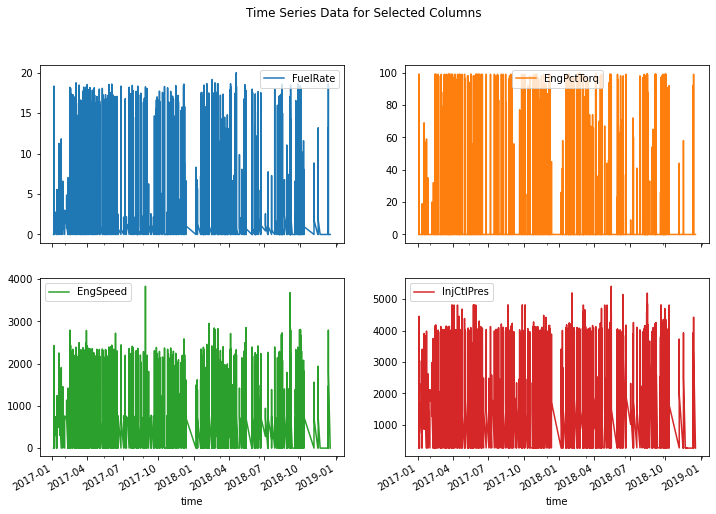

In [27]:
#plot few key columns on time index ['FuelRate', 'EngPctTorq', 'EngSpeed', 'InjCtlPres']
df_2017_2018_selected[['FuelRate', 'EngPctTorq', 'EngSpeed', 'InjCtlPres']].plot(subplots=True, layout=(2, 2), figsize=(12, 8))
plt.suptitle('Time Series Data for Selected Columns')
plt.show()


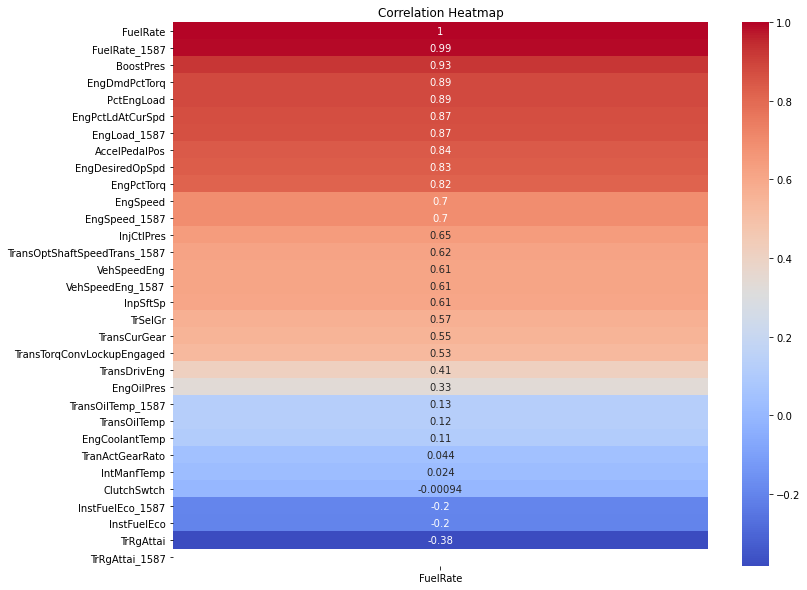

In [28]:
#run a correlation study on the FuelRate as compared to the other columns
correlation = df_2017_2018_selected.corr()
correlation = correlation['FuelRate'].sort_values(ascending=False)
#heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

FuelRate and FuelRate_1587 are the same.  Theefore, you have to eliminate one of the channel from the columns

In [29]:
#select channels that more than .5 correlation with FuelRate
selected_columns_high_correlation = correlation[correlation > 0.1].index.tolist()
display(selected_columns_high_correlation)


['FuelRate',
 'FuelRate_1587',
 'BoostPres',
 'EngDmdPctTorq',
 'PctEngLoad',
 'EngPctLdAtCurSpd',
 'EngLoad_1587',
 'AccelPedalPos',
 'EngDesiredOpSpd',
 'EngPctTorq',
 'EngSpeed',
 'EngSpeed_1587',
 'InjCtlPres',
 'TransOptShaftSpeedTrans_1587',
 'VehSpeedEng',
 'VehSpeedEng_1587',
 'InpSftSp',
 'TrSelGr',
 'TransCurGear',
 'TransTorqConvLockupEngaged',
 'TransDrivEng',
 'EngOilPres',
 'TransOilTemp_1587',
 'TransOilTemp',
 'EngCoolantTemp']

In [34]:
#preproces the data
# VehSpeedEng>0 or < 60
# EngSpeed > 700
# FuelRate > .5
# AccelPedalPos > 0

#create a fubction to preprocess the data
df_2017_2018_selected_high_correlation = df_2017_2018_selected[selected_columns_high_correlation]
def preprocess_data(df):
    df = df[(df['VehSpeedEng'] > 0) & (df['VehSpeedEng'] < 60)]
    df = df[df['EngSpeed'] > 700]
    df = df[df['FuelRate'] > 0.5]
    df = df[df['AccelPedalPos'] > 0]
    return df
df_2017_2018_selected_preprocessed = preprocess_data(df_2017_2018_selected_high_correlation)
#drop duplicate similar columns
#['FuelRate_1587', 'TransOilTemp_1587', 'VehSpeedEng_1587', 'EngSpeed_1587', 'TransDrivEng']
df_2017_2018_selected_preprocessed = df_2017_2018_selected_preprocessed.drop(['FuelRate_1587', 'TransOilTemp_1587', 'VehSpeedEng_1587', 'EngSpeed_1587', 'TransDrivEng'], axis=1)
df_2017_2018_selected_preprocessed.shape
# #convert the data colums of TrSelGr, TransCurGear, TransTorqConvLockupEngaged as categorical data
# df_2017_2018_selected_preprocessed['TrSelGr'] = df_2017_2018_selected_preprocessed['TrSelGr'].astype('category')
# df_2017_2018_selected_preprocessed['TransCurGear'] = df_2017_2018_selected_preprocessed['TransCurGear'].astype('category')
# df_2017_2018_selected_preprocessed['TransTorqConvLockupEngaged'] = df_2017_2018_selected_preprocessed['TransTorqConvLockupEngaged'].astype('category')

(305274, 20)

In [35]:
# EDA on the df_2017_2018_selected_preprocessed
ExploratoryDataAnalysis(df_2017_2018_selected_preprocessed)

,null_sum,null_pct,dtypes,count,mean,median,min,max
FuelRate,0,0.0,float64,305274,5.449051,4.623011,0.528344,19.997824
BoostPres,0,0.0,float64,305274,5.178161,2.900800,0.000000,27.267521
EngDmdPctTorq,0,0.0,float64,305274,35.571988,33.000000,0.000000,93.000000
PctEngLoad,0,0.0,float64,305274,35.571981,33.000000,0.000000,93.000000
EngPctLdAtCurSpd,0,0.0,float64,305274,37.732719,33.000000,0.000000,99.000000
EngLoad_1587,0,0.0,float64,305274,36.049100,32.500000,0.000000,99.500000
AccelPedalPos,0,0.0,float64,305274,37.768561,36.400002,0.400000,100.000000
EngDesiredOpSpd,0,0.0,float64,305274,1496.252067,1481.625000,700.000000,2800.000000
EngPctTorq,0,0.0,float64,305274,36.386915,37.000000,0.000000,99.000000
EngSpeed,0,0.0,float64,305274,1430.814738,1479.000000,700.250000,2824.500000


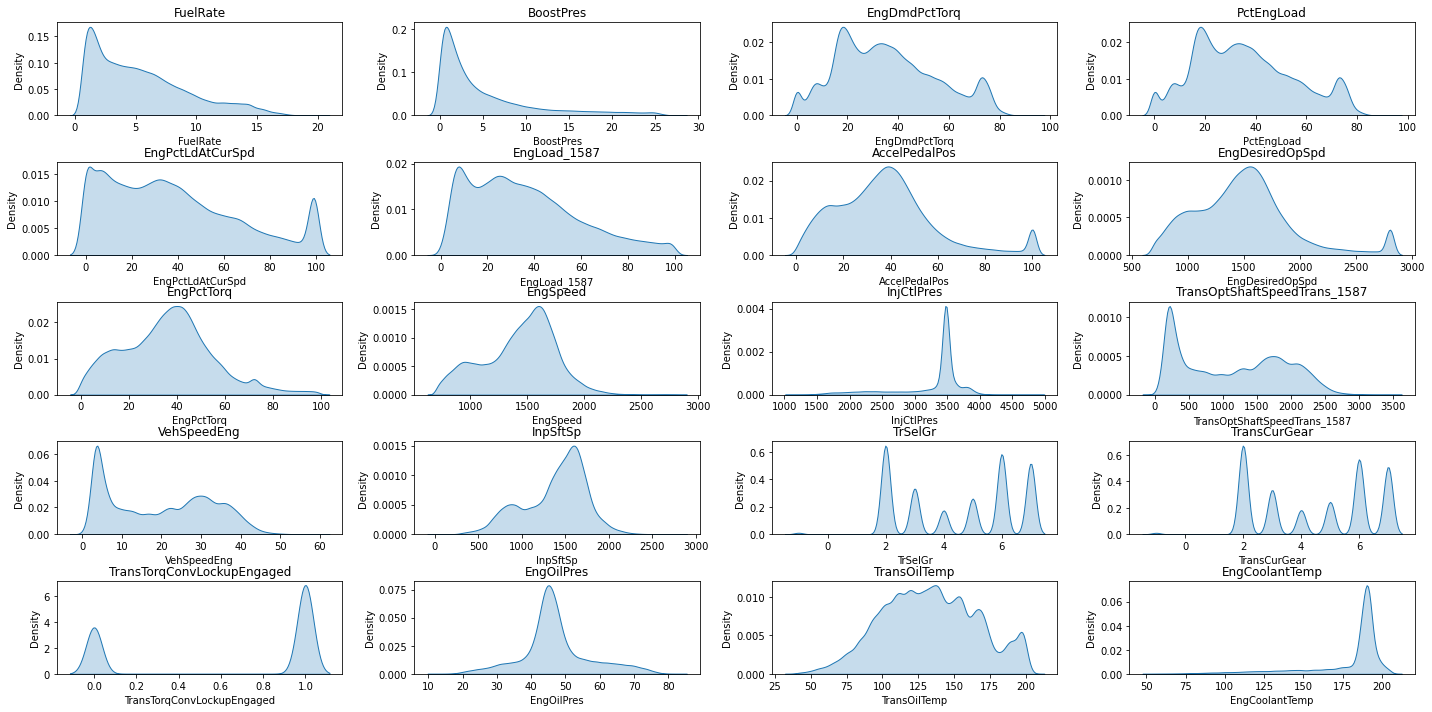

In [36]:
# create 5 by 4 grid, put the kde plot for each column
def kde_plot_3_by_7(df):
    fig, ax = plt.subplots(5, 4, figsize=(20, 10))
    ax = ax.ravel()
    for i, col in enumerate(df.columns):
        sns.kdeplot(df[col], fill =True, ax=ax[i])
        ax[i].set_title(col)
    plt.tight_layout()
    #add space between the plots
    plt.subplots_adjust(hspace=0.5)
    
    plt.show()
kde_plot_3_by_7(df_2017_2018_selected_preprocessed)


| Description | Measurement_Unit | Description |
|-------------|------------------|---------------------|
| Accelerator Pedal Position (Engine) | Percentage | Measures how far the accelerator pedal is depressed |
| Boost Pressure/Engine Intake Manifold #1 Pres... | Pounds Per Square Inch | Indicates the pressure within the first intake manifold |
| Engine Coolant Temperature (Engine) | Degrees Fahrenheit | Monitors the temperature of the engine's coolant |
| Engine's Desired Operating Speed (Engine) | Revolutions Per Minute (RPM) | Target RPM for optimal engine performance |
| Engine Demand - Percent Torque (Engine) | Integer Percentage, Percent Form | Percentage of maximum torque currently demanded by the engine |
| Engine Load (Engine) | Percentage | Represents the current load on the engine compared to its maximum capacity |
| Engine Oil Pressure (Engine) | Pounds Per Square Inch | Pressure of the oil circulating in the engine |
| Engine Percent Load At Current Speed (Engine) | Percentage | Load on the engine at the current RPM |
| Driver's Demand Engine - Percent Torque (Engine) | Percentage | Percentage of torque the driver is requesting with the throttle position |
| Engine Speed (Engine) | Revolutions Per Minute (RPM) | Current RPM of the engine |
| Fuel Rate (Instantaneous) (Engine) | Gallons (U.S.) Per Hour | The rate at which fuel is being consumed by the engine |
| Injection Control Pressure (Engine) | Pounds Per Square Inch | Pressure at which fuel is injected into the engine |
| Input Shaft Speed (Transmission) | Revolutions Per Minute (RPM) | RPM of the transmission's input shaft |
| Actual Engine- Percent Torque (Engine) | Percentage | Actual torque output of the engine as a percentage of the maximum |
| Transmission Current Gear (Transmission) | Number | The gear currently engaged in the transmission |
| Transmission Oil Temperature (Transmission) | Degrees Fahrenheit | Temperature of the transmission oil |
| Transmission Output Shaft Speed (Transmission) | Revolutions Per Minute (RPM) | RPM of the transmission's output shaft |
| Transmission Torque Converter Lockup Engaged ... | True/False | Indicates whether the torque converter lockup is engaged |
| Transmission Selected Gear (Transmission) | Number | Gear selected by the transmission system |
| Vehicle Speed (Engine) | Miles Per Hour | Speed at which the vehicle is traveling |


In [16]:
#convert the data colums of TrSelGr, TransCurGear, TransTorqConvLockupEngaged as categorical data
df_2017_2018_selected_preprocessed['TrSelGr'] = df_2017_2018_selected_preprocessed['TrSelGr'].astype('category')
df_2017_2018_selected_preprocessed['TransCurGear'] = df_2017_2018_selected_preprocessed['TransCurGear'].astype('category')
df_2017_2018_selected_preprocessed['TransTorqConvLockupEngaged'] = df_2017_2018_selected_preprocessed['TransTorqConvLockupEngaged'].astype('category')


In [17]:
#training data
df_2017 = df_2017_2018_selected_preprocessed[(df_2017_2018_selected_preprocessed.index > '2017-01-01') & (df_2017_2018_selected_preprocessed.index < '2018-01-01')]
#testing data
df_2018_jan_feb = df_2017_2018_selected_preprocessed[(df_2017_2018_selected_preprocessed.index > '2018-01-01') & (df_2017_2018_selected_preprocessed.index < '2018-03-01')]
#validation data
df_2018_mar_dec = df_2017_2018_selected_preprocessed[(df_2017_2018_selected_preprocessed.index > '2018-03-01') & (df_2017_2018_selected_preprocessed.index < '2019-01-01')]

print('training data size:', df_2017.shape)
print('testing data size:', df_2018_jan_feb.shape)
print('validation data size:', df_2018_mar_dec.shape)

training data size: (182137, 20)
testing data size: (25894, 20)
validation data size: (97243, 20)


MSE: 0.52900437231989
MAE: 0.45949443980194
R2: 0.9647562218664728


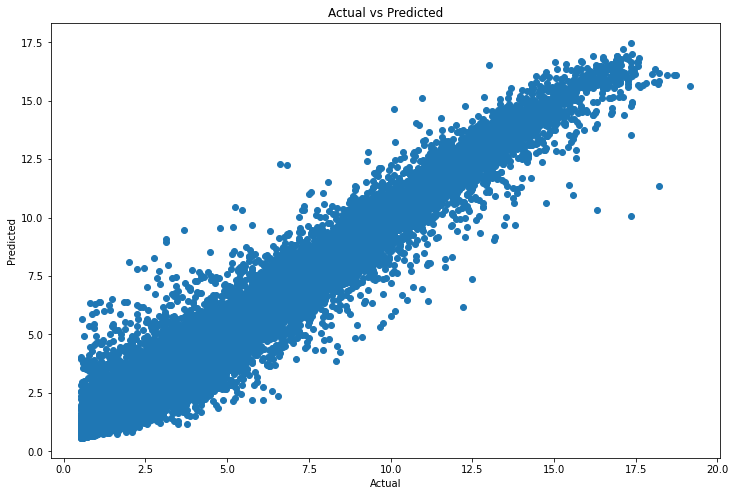

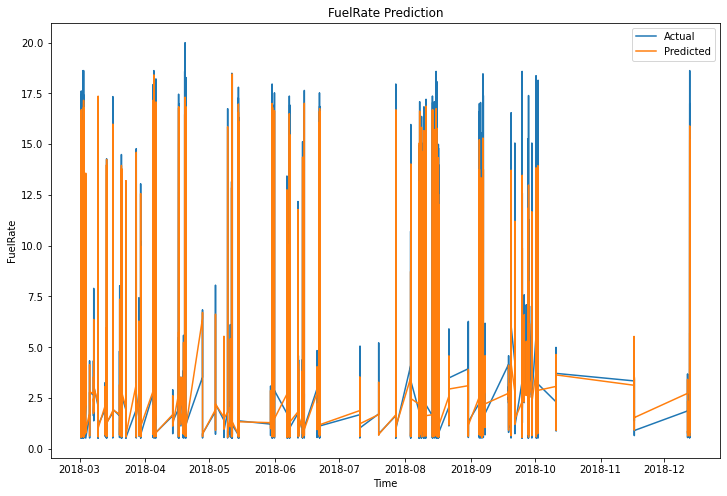

In [37]:
# perform randomforest on this data to predict FuelRate
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#split the data into X and y
X_train = df_2017.drop('FuelRate', axis=1)
y_train = df_2017['FuelRate']
X_test = df_2018_jan_feb.drop('FuelRate', axis=1)
y_test = df_2018_jan_feb['FuelRate']

#train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predict the model
y_pred = model.predict(X_test)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

#plot the actual vs predicted
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#validate the model
#split the data into X and y
X_val = df_2018_mar_dec.drop('FuelRate', axis=1)
y_val = df_2018_mar_dec['FuelRate']

#predict the model
y_val_pred = model.predict(X_val)

#evaluate the model
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

#plot the mse in the time scale along with the original data y_val
plt.figure(figsize=(12, 8))
plt.plot(y_val.index, y_val.values, label='Actual')
plt.plot(y_val.index, y_val_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('FuelRate')
plt.title('FuelRate Prediction')
plt.legend()
plt.show()


In [40]:
print(mse_val)
print(mae_val)
print(r2_val)

1.6500046222713123
0.7426724488407482
0.8966333854682891


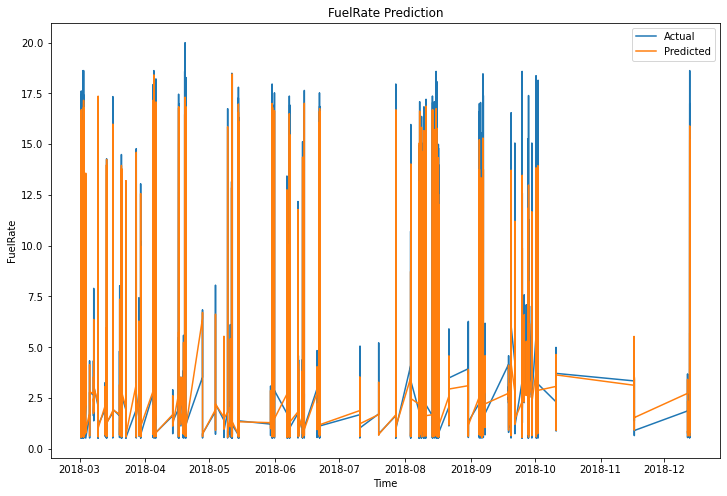

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(y_val.index, y_val.values, label='Actual')
plt.plot(y_val.index, y_val_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('FuelRate')
plt.title('FuelRate Prediction')
plt.legend()
plt.show()

#Supervised Learning
•	Methods description (10 points)
o	Briefly describe your supervised learning workflow, the learning methods you used, and the feature representations you chose. You must justify why you chose your methods.
o	You should have an adequate number and nature of methods: a minimum of three diverse model families must be described and explored (i.e. with very different underlying mechanisms, e.g. probabilistic, non-probabilistic, tree-based, instance-based, etc).  This might be variable with larger or smaller teams and project specifics, with instructor permission. 
o	Include a description of how you did hyperparameter tuning or exploration with your models.
o	Methods used must be clearly described, each with correct justification.
•	Supervised Evaluation (22 points)
o	In this section you will provide a correct and comprehensive evaluation, analyzing the effectiveness of both your methods, and your feature representations. 
o	(8 points) Overall results reporting. 
	State and justify your choice of evaluation metrics used.
	Provide at least one overall summary of results that compares the best model from each family you used, in a clear, concise table. 
	If comparing an evaluation metric between model families (e.g. comparing accuracy of support vector machines vs logistic regression), do not use just the result of a single training/test split: you must report the mean metric across multiple cross-validation folds (typically 5-fold CV), along with the standard deviation of the metric.
o	Please see the “Tips for Project Report” video under “Week 6 Project Check-in” for key methods to get insight into your machine learning model and how to report results.
o	For the following parts of the evaluation, typically you will do these deeper analysis steps only on your best-performing model (not all of them).
o	(6 points) Do a feature importance and/or ablation analysis on your best model to get insight into which features are or are not contributing to prediction success/failure.
o	(4 points) Do at least one sensitivity analysis on your best model: How sensitive are your results to choice of (hyper-)parameters, features, or other varying solution elements?
o	(4 points) Given your evaluation results and metrics, what important tradeoffs can you identify?  Some examples:  precision vs recall, training data size vs accuracy, speed vs accuracy, etc.
•	Failure analysis (6 points)
o	Select at least 3 *specific* examples where prediction failed, and analyze possible reasons why. 
o	Ideally you should be able to identify at least three different categories of failure.
o	What future improvements might fix the failures?  (You do not need to implement these)
